### show the data process

In [ ]:
import pandas as pd
osm=pd.read_csv('OSM.csv')
osm_fid=osm['FID'].values.tolist()
print(len(osm_fid))

0
5458


In [ ]:
sv=pd.read_csv('SV.csv')
sv['0517ID']=sv['nid'].apply(lambda x: x[0:23])
# df['age']=df['age'].apply(lambda x: x+3)
sv.head(1)

,FID,descriptio,tags,lat_wgs,lon_wgs,pov_exp,heading,orgid,nid,scene,...,F13,F14,F15,F16,F17,F18,F19,F20,F21,0517ID
0,0,Ｇ１０７,GENERAL,30.612083,114.164546,2.0,107.0,10141003150599999000000.000000000000000,10141003150629162530900_right_28.jpg,a road with cars driving on it ; a group of ca...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10141003150629162530900


In [ ]:
#不同值代表不同的用地类型
sv_osm=pd.read_csv('OSMSV.csv')
print(sv_osm.columns)
sv_osm.head(1)

Index(['OBJECTID', 'Join_Count', 'TARGET_FID', 'JOIN_FID', 'descriptio',
       'tags', 'lat_wgs', 'lon_wgs', 'pov_exp', 'heading', 'orgid', 'nid',
       'scene', 'label', 'multi_labe', 'BUFF_DIST', 'ORIG_FID', 'OBJECTID_1',
       'Join_Count_1', 'osm_id', 'Shape_Length', 'Shape_Area'],
      dtype='object')


,OBJECTID,Join_Count,TARGET_FID,JOIN_FID,descriptio,tags,lat_wgs,lon_wgs,pov_exp,heading,...,scene,label,multi_labe,BUFF_DIST,ORIG_FID,OBJECTID_1,Join_Count_1,osm_id,Shape_Length,Shape_Area
0,1,29,1,111,Ｇ１０７,GENERAL,30.612083,114.164546,2.0,107.0,...,a road with cars driving on it ; a group of ca...,9.0,[],30.0,0,1,1,58871382,0.001833,2.648248e-07


In [ ]:
sv_fid=list(set(sv_osm['ORIG_FID'].values.tolist()))
print(sv_fid[0])
print(len(sv_fid))

0
13889


In [ ]:
sv_osm.shape
#平均5000+路段,每个路段有5个连接

(28693, 22)

In [ ]:
osm_sv_scene={}
osm_sv_id={}
osm_sv_imgpath={}

osm_sv_label={}
osm_sv_wuhan={}

for i in osm_fid:
  osm_sv_id[i]=sv_osm[sv_osm['JOIN_FID']==i]['ORIG_FID'].values.tolist()
  osm_sv_scene[i]=sv_osm[sv_osm['JOIN_FID']==i]['scene'].values.tolist()
  osm_sv_imgpath[i]=sv_osm[sv_osm['JOIN_FID']==i]['nid'].values.tolist()
  #来计算标签
  osm_sv_label[i]=sv_osm[sv_osm['JOIN_FID']==i]['multi_labe'].values.tolist()
  # osm_sv_wuhan[i]=sv_osm[sv_osm['JOIN_FID']==i]['type'].values.tolist()

### show the data

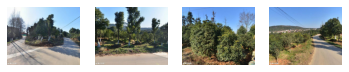

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
tmp=location_image['10141119130101140934800']

fig, (ax1,ax2,ax3,ax4) = plt.subplots(1, 4)
# figure(figsize = (10,10)) #
# fig.suptitle('Horizontally stacked subplots')
ax1.imshow(Image.open(os.path.join('/content/streetview',tmp[0])))
ax1.axis('off')
ax2.imshow(Image.open(os.path.join('/content/streetview',tmp[1])))
ax2.axis('off')
ax3.imshow(Image.open(os.path.join('/content/streetview',tmp[2])))
ax3.axis('off')
ax4.imshow(Image.open(os.path.join('/content/streetview',tmp[3])))
ax4.axis('off')
plt.savefig('9.jpg',dpi=300)

In [ ]:
import torch
print(torch.__version__)  #注意是双下划线

1.11.0+cu113


In [ ]:
!pip install torch-scatter -f https://data.pyg.org/whl/torch-1.11.0+cu113.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-1.11.0+cu113.html
!pip install torch-geometric

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://data.pyg.org/whl/torch-1.11.0+cu113.html
     |████████████████████████████████| 7.9 MB 2.8 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://data.pyg.org/whl/torch-1.11.0+cu113.html
     |████████████████████████████████| 3.5 MB 2.9 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 407 kB 5.1 MB/s 
  Created wheel for torch-geometric: filename=torch_geometric-2.0.4-py3-none-any.whl size=616603 sha256=6af8f818625b080ff2e5ed4bb926e188f258bc532eeb14d49e28eaac413a59b6
  Stored in directory: /root/.cache/pip/wheels/18/a6/a4/ca18c3051fcead866fe7b85700ee2240d883562a1bc70ce421
Successfully built torch-geometric


In [ ]:
with open('OsmRoadJoinLarge1_buffer_forgeoda_k5.gwt','r+') as f:
  edges=f.readlines()
edge_index=[]
for edge in edges[1:]:
  edge_index.append(list(map(int,edge.split(' ')[0:2])))
edge_index = torch.tensor(edge_index, dtype=torch.long) 
len(edge_index)

27290

In [ ]:
with open('OsmRoadJoinLarge1_buffer_forgeoda_Queen.gal','r+') as f:
  edges=f.readlines()
edge_index=[]
num = 0  # 行数-1
adds=0
for line in edges[1:]:
  if (num % 2) == 0:  # num为偶数说明是奇数行
    tmp=line.strip().split(' ')
    origin=int(tmp[0])
    if int(tmp[1])>0:
      condition=1
    else:
      condition=0
  else:  # # num为奇数说明是偶数行
    tmp=line.strip().split(' ')
    if condition==1:
      for j in tmp:
        edge_index.append([origin,int(j)])
    else:
      if origin<5457:
        edge_index.append([origin,origin+1])
      else:
        edge_index.append([origin,origin-1])
      adds=adds+1
  num += 1
edge_index = torch.tensor(edge_index, dtype=torch.long) 
edge_index.shape

torch.Size([23549, 2])

#### build node features

In [ ]:
# %time
# embeddings = model.encode(scene_list)

print(pd.read_csv('osmembd0516.csv').values.shape)
embeddings=pd.read_csv('osmembd0516.csv').values[:,1:].T
embeddings.shape

(768, 5459)


(5458, 768)

#### build y label  and test_mask

In [ ]:
labels=[101,201,202,301,402,501,502,503,504,505]
slabels=["['101']","['201']","['202']","['301']","['402']","['501']","['502']","['503']","['504']","['505']"]
types_label=['0', '1', '10', '2', '3', '4', '5', '6', '7', '8', '9']
#{' ', '0', '1', '10', '2', '3', '4', '5', '6', '7', '8', '9', nan}

In [ ]:
osm_fid_label={}
for fid in osm_fid:
  tmp=osm_sv_label[fid]
  max_label=max(tmp,key=tmp.count)
  max_label_num=tmp.count(max(tmp,key=tmp.count))
  if max_label in slabels:
    res_label=slabels.index(max_label)
  else:
    res_label=-1
  osm_fid_label[fid]=[res_label,max_label_num]

In [ ]:
#deal with multi labels
label_mask=[]
label_y=[]
for fid in osm_fid:
  if osm_fid_label[fid][1]>2 and osm_fid_label[fid][0]!=-1:
    label_y.append(osm_fid_label[fid][0])
    label_mask.append(True)
  else:
    label_y.append(-1)
    label_mask.append(False)

In [ ]:
from collections import Counter
result = Counter(label_y)
result

Counter({-1: 4930,
         0: 320,
         1: 15,
         2: 29,
         3: 37,
         4: 6,
         5: 6,
         6: 65,
         7: 12,
         8: 28,
         9: 10})

In [ ]:
#deal with multi labels
label_mask=[]
label_y=[]
balanced_label=0
for fid in osm_fid:
  if osm_fid_label[fid][0]==0:
    balanced_label=balanced_label+1
  if osm_fid_label[fid][1]>2 and osm_fid_label[fid][0]!=-1:
    if balanced_label>200 and osm_fid_label[fid][0]==0:
      label_y.append(-1)
      label_mask.append(False)
    else:
      label_y.append(osm_fid_label[fid][0])
      label_mask.append(True) 
  else:
    label_y.append(-1)
    label_mask.append(False)
from collections import Counter
result = Counter(label_y)
result

Counter({-1: 5163,
         0: 87,
         1: 15,
         2: 29,
         3: 37,
         4: 6,
         5: 6,
         6: 65,
         7: 12,
         8: 28,
         9: 10})

In [ ]:
import numpy as np
pd.DataFrame({'Origin':np.array(label_y)}).to_csv('Origin.csv')

#### training

In [ ]:
import torch
from torch_geometric.data import Data
import numpy as np
# edge_index = edge_index
x = torch.tensor(embeddings, dtype=torch.float)

data = Data(x=x, edge_index=edge_index.t().contiguous(),
y=torch.from_numpy(np.array(label_y)),
train_mask=torch.from_numpy(np.array(label_mask)),
test_mask=torch.from_numpy(np.array(label_mask)))

In [ ]:
from torch_geometric.nn import GCNConv
import torch
from torch.nn import Linear
import torch.nn.functional as F
class GCN(torch.nn.Module):
    def __init__(self, hidden_channel1,hidden_channel2):
        super().__init__()
        torch.manual_seed(1234567)
        self.conv1 = GCNConv(768, hidden_channel1)#768
        self.conv2 = GCNConv(hidden_channel1, hidden_channel2)
        self.conv3 = GCNConv(hidden_channel2,10)#dataset.num_classes

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = F.dropout(x, p=0.2, training=self.training)
        x = self.conv2(x, edge_index)
        x = x.relu()
        x = F.dropout(x, p=0.2, training=self.training)
        x = self.conv3(x, edge_index)
        return x
model = GCN(hidden_channel1=32,hidden_channel2=16)
print(model)

GCN(
  (conv1): GCNConv(768, 32)
  (conv2): GCNConv(32, 16)
  (conv3): GCNConv(16, 10)
)


In [ ]:
from torch_geometric.nn import SAGEConv
import torch
from torch.nn import Linear
import torch.nn.functional as F
class SAGE(torch.nn.Module):
    def __init__(self, hidden_channel1,hidden_channel2):
        super().__init__()
        torch.manual_seed(1234567)
        self.conv1 = SAGEConv(768, hidden_channel1)#768
        self.conv2 = SAGEConv(hidden_channel1, hidden_channel2)
        self.conv3 = SAGEConv(hidden_channel2,10)#dataset.num_classes

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = F.dropout(x, p=0.2, training=self.training)
        x = self.conv2(x, edge_index)
        x = x.relu()
        x = F.dropout(x, p=0.2, training=self.training)
        x = self.conv3(x, edge_index)
        return x
model = SAGE(hidden_channel1=32,hidden_channel2=16)
print(model)

SAGE(
  (conv1): SAGEConv(768, 32)
  (conv2): SAGEConv(32, 16)
  (conv3): SAGEConv(16, 10)
)


In [ ]:
from torch_geometric.nn import GATConv
class GAT(torch.nn.Module):
    def __init__(self, hidden_channels, heads):
        super().__init__()
        torch.manual_seed(1234567)
        self.hid = 64
        self.in_head = 8
        self.out_head = 10
        # self.conv1 = GATConv(...)  # TODO
        # self.conv2 = GATConv(...)  # TODO
        self.conv1 = GATConv(768, self.hid, heads=self.in_head, dropout=0.6)

        self.conv2 = GATConv(self.hid*self.in_head,10,concat=False,
                             heads=self.out_head, dropout=0.6)
    def forward(self, x, edge_index):
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv1(x, edge_index)
        x = F.elu(x)
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv2(x, edge_index)
        return x

model = GAT(hidden_channels=8, heads=8)
print(model)

optimizer = torch.optim.Adam(model.parameters(), lr=0.005, weight_decay=5e-4)
criterion = torch.nn.CrossEntropyLoss()

def train():
      model.train()
      optimizer.zero_grad()  # Clear gradients.
      out = model(data.x, data.edge_index)  # Perform a single forward pass.
      loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes.
      loss.backward()  # Derive gradients.
      optimizer.step()  # Update parameters based on gradients.
      return loss
def test(mask):
      model.eval()
      out = model(data.x, data.edge_index)
      pred = out.argmax(dim=1)  # Use the class with highest probability.
      correct = pred[mask] == data.y[mask]  # Check against ground-truth labels.
      acc = int(correct.sum()) / int(mask.sum())  # Derive ratio of correct predictions.
      return acc
for epoch in range(1,201):
    loss = train()
    val_acc = test(data.test_mask)
    test_acc = test(data.test_mask)
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, Val: {val_acc:.4f}, Test: {test_acc:.4f}')

GAT(
  (conv1): GATConv(768, 64, heads=8)
  (conv2): GATConv(512, 10, heads=10)
)
Epoch: 001, Loss: 2.6986, Val: 0.2949, Test: 0.2949
Epoch: 002, Loss: 2.8237, Val: 0.2237, Test: 0.2237
Epoch: 003, Loss: 2.5791, Val: 0.1729, Test: 0.1729
Epoch: 004, Loss: 2.4887, Val: 0.1492, Test: 0.1492
Epoch: 005, Loss: 2.4117, Val: 0.3085, Test: 0.3085
Epoch: 006, Loss: 2.2896, Val: 0.3085, Test: 0.3085
Epoch: 007, Loss: 2.2410, Val: 0.3051, Test: 0.3051
Epoch: 008, Loss: 2.1366, Val: 0.2373, Test: 0.2373
Epoch: 009, Loss: 2.2014, Val: 0.2339, Test: 0.2339
Epoch: 010, Loss: 2.0535, Val: 0.2949, Test: 0.2949
Epoch: 011, Loss: 2.0487, Val: 0.2610, Test: 0.2610
Epoch: 012, Loss: 2.0391, Val: 0.3525, Test: 0.3525
Epoch: 013, Loss: 2.0503, Val: 0.3322, Test: 0.3322
Epoch: 014, Loss: 2.0230, Val: 0.3424, Test: 0.3424
Epoch: 015, Loss: 1.9873, Val: 0.3627, Test: 0.3627
Epoch: 016, Loss: 2.0101, Val: 0.3729, Test: 0.3729
Epoch: 017, Loss: 2.0073, Val: 0.3797, Test: 0.3797
Epoch: 018, Loss: 1.9751, Val: 0.3

In [ ]:
data.x.shape

torch.Size([5458, 32])

In [ ]:
data.edge_index.shape

torch.Size([2, 23549])

In [ ]:
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))
model =SAGE(64,32)# GCN(64,32)#(32,16)#(32,16)#(64,32)#(32,16)#(64,32)#GCN
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
criterion = torch.nn.CrossEntropyLoss()
def train():
      model.train()
      optimizer.zero_grad()  # Clear gradients.
      out = model(data.x,data.edge_index)  # Perform a single forward pass.
      loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes.
      loss.backward()  # Derive gradients.
      optimizer.step()  # Update parameters based on gradients.
      return loss
def test():
      model.eval()
      out = model(data.x, data.edge_index)
      pred = out.argmax(dim=1)  # Use the class with highest probability.
      test_correct = pred[data.test_mask] == data.y[data.test_mask]  # Check against ground-truth labels.
      test_acc = int(test_correct.sum()) / int(data.test_mask.sum())  # Derive ratio of correct predictions.
      return test_acc
for epoch in range(1, 101):
    loss = train()
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')

<IPython.core.display.Javascript object>

Epoch: 001, Loss: 2.3795
Epoch: 002, Loss: 3.5209
Epoch: 003, Loss: 2.2605
Epoch: 004, Loss: 2.2784
Epoch: 005, Loss: 2.1035
Epoch: 006, Loss: 2.0492
Epoch: 007, Loss: 2.0816
Epoch: 008, Loss: 2.0351
Epoch: 009, Loss: 1.9697
Epoch: 010, Loss: 1.9322
Epoch: 011, Loss: 1.9191
Epoch: 012, Loss: 1.8664
Epoch: 013, Loss: 1.8688
Epoch: 014, Loss: 1.8382
Epoch: 015, Loss: 1.8297
Epoch: 016, Loss: 1.7954
Epoch: 017, Loss: 1.7708
Epoch: 018, Loss: 1.7571
Epoch: 019, Loss: 1.7694
Epoch: 020, Loss: 1.7277
Epoch: 021, Loss: 1.7178
Epoch: 022, Loss: 1.7552
Epoch: 023, Loss: 1.6762
Epoch: 024, Loss: 1.6561
Epoch: 025, Loss: 1.6540
Epoch: 026, Loss: 1.6718
Epoch: 027, Loss: 1.6450
Epoch: 028, Loss: 1.6394
Epoch: 029, Loss: 1.6151
Epoch: 030, Loss: 1.5448
Epoch: 031, Loss: 1.5682
Epoch: 032, Loss: 1.5780
Epoch: 033, Loss: 1.5861
Epoch: 034, Loss: 1.5654
Epoch: 035, Loss: 1.5310
Epoch: 036, Loss: 1.5057
Epoch: 037, Loss: 1.5284
Epoch: 038, Loss: 1.4975
Epoch: 039, Loss: 1.5249
Epoch: 040, Loss: 1.5006


In [ ]:
tmp=pd.DataFrame({'Type':pred.numpy()})
tmp.index.name = 'FID'
tmp.to_csv('means_sage_6432.csv')#3216 6432

In [ ]:
out = model(data.x, data.edge_index)
pred = out.argmax(dim=1)  # Use the class with highest probability.
from collections import Counter
result = Counter(pred.numpy().tolist())
result

Counter({0: 1817,
         1: 138,
         2: 562,
         3: 666,
         4: 27,
         5: 14,
         6: 1624,
         7: 100,
         8: 383,
         9: 127})

#### confusion matrix

<Figure size 720x576 with 0 Axes>

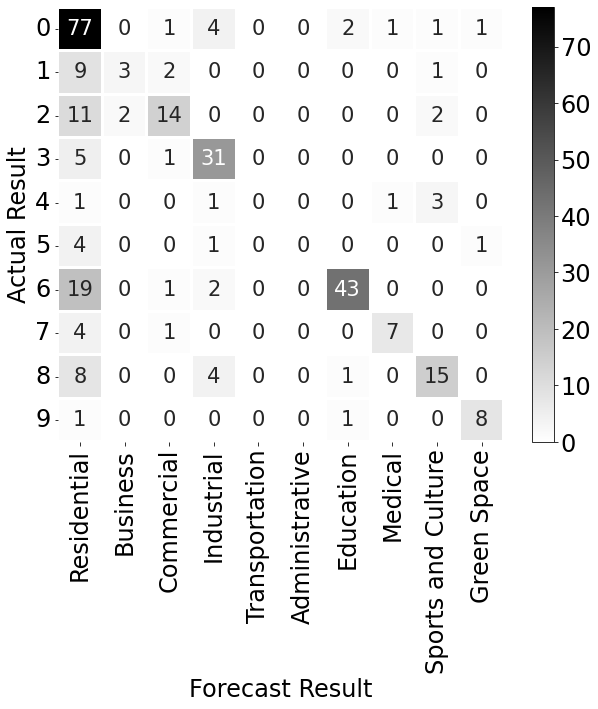

In [ ]:
#confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
df_cm=pd.DataFrame(conmatrix,
columns=["Residential","Business","Commercial","Industrial","Transportation","Administrative","Education","Medical","Sports and Culture","Green Space"])#&Transport
plt.figure(figsize=(10,8))
f, ax= plt.subplots(figsize = (10, 8))
 
h=sns.heatmap(df_cm,annot=True,cmap="binary",fmt='.20g',ax=ax,linewidths=2,
            annot_kws={'size':21},cbar=False)
 
#h=sns.heatmap(data, annot=True,fmt='d',linewidths=0.5,cbar=False) #设置不使用其默认自带的colorbar
cb=h.figure.colorbar(h.collections[0]) #显示colorbar
cb.ax.tick_params(labelsize=24) #设置colorbar刻度字体大小。
 
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
 
ax.tick_params(labelsize=24)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
 
plt.ylabel('Actual Result',fontsize=24)
plt.xlabel('Forecast Result',fontsize=24)
plt.savefig('kmeans.svg',format='svg')
plt.show()

In [ ]:
conmatrix

array([[72,  0,  1,  5,  0,  0,  4,  1,  4,  0],
       [ 6,  3,  3,  1,  0,  0,  0,  0,  2,  0],
       [ 3,  0, 24,  0,  0,  0,  0,  0,  2,  0],
       [ 3,  0,  2, 29,  0,  0,  0,  0,  3,  0],
       [ 1,  1,  0,  0,  0,  0,  0,  0,  4,  0],
       [ 4,  0,  0,  0,  0,  0,  0,  0,  1,  1],
       [15,  0,  1,  5,  0,  0, 43,  0,  1,  0],
       [ 2,  0,  2,  0,  0,  0,  0,  7,  1,  0],
       [ 3,  0,  2,  2,  0,  0,  1,  0, 20,  0],
       [ 1,  0,  0,  0,  0,  0,  2,  0,  0,  7]])

In [ ]:
# Install required packages.
import os
# Helper function for visualization.
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def visualize(h, color):
    z = TSNE(n_components=2).fit_transform(h.detach().cpu().numpy())

    plt.figure(figsize=(10,10))
    plt.xticks([])
    plt.yticks([])
    
    plt.scatter(z[:, 0], z[:, 1], s=70, c=color, cmap="Set2")
    plt.legend()
    plt.show()
# fig, ax = plt.subplots()
# ax.plot(a, c, 'k--', label='Model length')
# ax.plot(a, d, 'k:', label='Data length')
# ax.plot(a, c + d, 'k', label='Total message length')
# legend = ax.legend(loc='upper center', shadow=True, fontsize='x-large')
# legend.get_frame().set_facecolor('C0')

In [ ]:
z = TSNE(n_components=2).fit_transform(out.detach().cpu().numpy())
color=pred

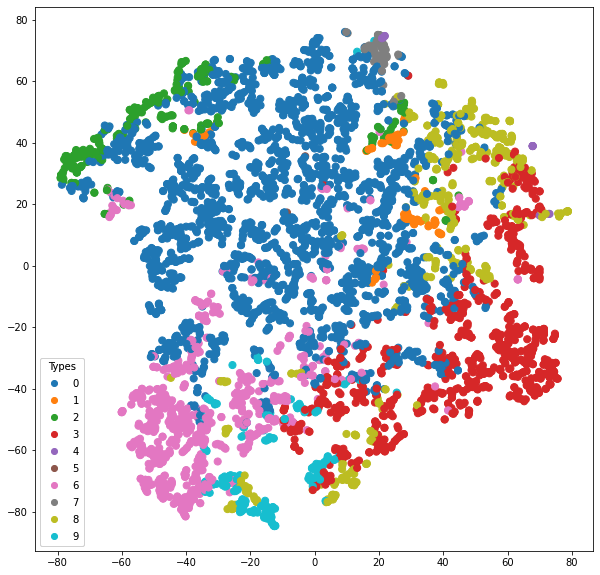

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
scatter = ax.scatter(z[:, 0], z[:, 1], s=50, c=color, 
                     vmin=0, vmax=9, cmap="tab10")
legend1 = ax.legend(*scatter.legend_elements(num=10),
                    loc="lower left", title="Types")
ax.add_artist(legend1)
plt.savefig('kmeansplot.svg')
plt.show()

### MLP experiment

In [ ]:
import torch
from torch.nn import Linear
import torch.nn.functional as F


class MLP(torch.nn.Module):
    def __init__(self, hidden_channels):
        super().__init__()
        torch.manual_seed(12345)
        self.lin1 = Linear(768, hidden_channels)
        self.lin2 = Linear(hidden_channels, 10)

    def forward(self, x):
        x = self.lin1(x)
        x = x.relu()
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.lin2(x)
        return x

model = MLP(hidden_channels=16)
print(model)
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

model = MLP(hidden_channels=16)
criterion = torch.nn.CrossEntropyLoss()  # Define loss criterion.
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)  # Define optimizer.

def train():
      model.train()
      optimizer.zero_grad()  # Clear gradients.
      out = model(data.x)  # Perform a single forward pass.
      loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes.
      loss.backward()  # Derive gradients.
      optimizer.step()  # Update parameters based on gradients.
      return loss

def test():
      model.eval()
      out = model(data.x)
      pred = out.argmax(dim=1)  # Use the class with highest probability.
      test_correct = pred[data.test_mask] == data.y[data.test_mask]  # Check against ground-truth labels.
      test_acc = int(test_correct.sum()) / int(data.test_mask.sum())  # Derive ratio of correct predictions.
      return test_acc

for epoch in range(1, 201):
    loss = train()
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')
test_acc = test()
print(f'Test Accuracy: {test_acc:.4f}')

MLP(
  (lin1): Linear(in_features=768, out_features=16, bias=True)
  (lin2): Linear(in_features=16, out_features=10, bias=True)
)


<IPython.core.display.Javascript object>

Epoch: 001, Loss: 2.3896
Epoch: 002, Loss: 2.7254
Epoch: 003, Loss: 2.1611
Epoch: 004, Loss: 2.2257
Epoch: 005, Loss: 2.1897
Epoch: 006, Loss: 2.1338
Epoch: 007, Loss: 2.1198
Epoch: 008, Loss: 2.0826
Epoch: 009, Loss: 2.0798
Epoch: 010, Loss: 2.0246
Epoch: 011, Loss: 2.0191
Epoch: 012, Loss: 2.0167
Epoch: 013, Loss: 1.9879
Epoch: 014, Loss: 2.0134
Epoch: 015, Loss: 2.0060
Epoch: 016, Loss: 1.9743
Epoch: 017, Loss: 1.9756
Epoch: 018, Loss: 1.9654
Epoch: 019, Loss: 1.9026
Epoch: 020, Loss: 1.9632
Epoch: 021, Loss: 1.9529
Epoch: 022, Loss: 1.9136
Epoch: 023, Loss: 1.9278
Epoch: 024, Loss: 1.9461
Epoch: 025, Loss: 1.8758
Epoch: 026, Loss: 1.8851
Epoch: 027, Loss: 1.9005
Epoch: 028, Loss: 1.9061
Epoch: 029, Loss: 1.8337
Epoch: 030, Loss: 1.8816
Epoch: 031, Loss: 1.8293
Epoch: 032, Loss: 1.9086
Epoch: 033, Loss: 1.8219
Epoch: 034, Loss: 1.8252
Epoch: 035, Loss: 1.7804
Epoch: 036, Loss: 1.8168
Epoch: 037, Loss: 1.8614
Epoch: 038, Loss: 1.8250
Epoch: 039, Loss: 1.8190
Epoch: 040, Loss: 1.8952


In [ ]:
out = model(data.x)
pred = out.argmax(dim=1)
pd.DataFrame({'Type':pred.numpy()}).to_csv('MLP.csv')#3216

In [ ]:
z = TSNE(n_components=2).fit_transform(out.detach().cpu().numpy())
color=pred

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [ ]:
pd.DataFrame({'1':color.numpy()}).to_csv('1.csv')

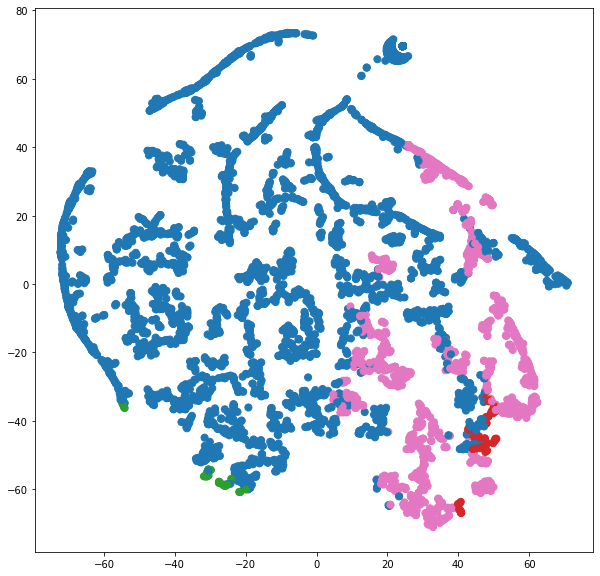

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
scatter = ax.scatter(z[:, 0], z[:, 1], s=50, c=color, 
                     vmin=0, vmax=9, cmap="tab10")
# legend1 = ax.legend(*scatter.legend_elements(num=10),loc="upper left", title="Types")
# ax.add_artist(legend1)
plt.savefig('restab10.svg')
plt.show()

<Figure size 720x576 with 0 Axes>

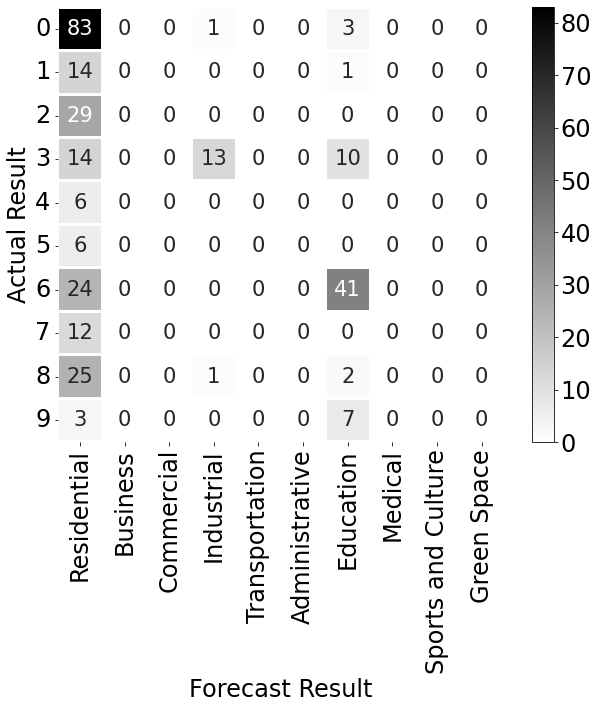

In [ ]:
#plot confusion matrix
from sklearn.metrics import confusion_matrix
conmatrix=confusion_matrix(data.y[data.test_mask], pred[data.test_mask])
import seaborn as sns
import matplotlib.pyplot as plt
df_cm=pd.DataFrame(conmatrix,
columns=["Residential","Business","Commercial","Industrial","Transportation","Administrative","Education","Medical","Sports and Culture","Green Space"])#&Transport
plt.figure(figsize=(10,8))
f, ax= plt.subplots(figsize = (10, 8))
 
h=sns.heatmap(df_cm,annot=True,cmap="binary",fmt='.20g',ax=ax,linewidths=2,
            annot_kws={'size':21},cbar=False)
 
#h=sns.heatmap(data, annot=True,fmt='d',linewidths=0.5,cbar=False) #设置不使用其默认自带的colorbar
cb=h.figure.colorbar(h.collections[0]) #显示colorbar
cb.ax.tick_params(labelsize=24) #设置colorbar刻度字体大小。
 
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
 
ax.tick_params(labelsize=24)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
 
plt.ylabel('Actual Result',fontsize=24)
plt.xlabel('Forecast Result',fontsize=24)
plt.savefig('cnn.svg',format='svg')
plt.show()